In [1]:
import os
os.chdir('..')
!pwd
import bilevel
from bilevel.build_all_models import *
from bilevel.OnlineLinearExpert import *
from bilevel.OnlineTreeExpert import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Users/krishna/Documents/Research/Simultaneous Classifier/folktables-experiments/multidecomp


Try with occp, education num, education; 

sex, race

## checking with occupation groups

In [2]:
df_adult = pd.read_csv('./data_small/adult_reconstruction.csv')

In [ ]:
df_adult['race'].unique(), df_adult['workclass'].unique(), len(df_adult['occupation'].unique())

In [3]:
len(df_adult['occupation'].unique())

15

In [158]:
df_adult.groupby('occupation')['income'].mean().sort_values()

low_income_occp = 
mid_income_occp = 
high_income_occp = [Prof-specialty ,Exec-managerial]

occupation
Priv-house-serv       8940.607438
Other-service        15303.976544
?                    17064.336006
Handlers-cleaners    19595.279070
Farming-fishing      24882.377422
Adm-clerical         26611.043326
Machine-op-inspct    26838.503578
Armed-Forces         31425.200000
Transport-moving     33163.423013
Sales                34611.518969
Craft-repair         35180.810733
Tech-support         38533.546016
Protective-serv      39383.426263
Prof-specialty       50182.144969
Exec-managerial      52003.814060
Name: income, dtype: float64

In [3]:
df_adult['education-num'].unique(), len(df_adult['education'].unique())

(array([13, 10,  7,  9, 15, 12, 11,  5,  4,  8, 14,  2,  6, 16,  3,  1]), 16)

In [22]:
df_adult[['education', 'education-num']].drop_duplicates().sort_values(by='education-num')

,education,education-num
1914,Preschool,1
69,1st-4th,2
473,5th-6th,3
40,7th-8th,4
37,9th,5
103,10th,6
2,11th,7
43,12th,8
3,HS-grad,9
1,Some-college,10


In [85]:
df_adult = pd.read_csv('./data_small/adult_reconstruction.csv')

In [4]:
numeric_all = ['hours-per-week', 'age', 'capital-gain', 'capital-loss', 'education-num', 'income']
cat_feat =  ['workclass', 'marital-status', 'relationship', 'native-country', 'occupation', 'race', 'sex']

# df_adult.drop(['race', 'sex', 'education'], axis = 1, inplace=True)
df_adult.drop(['education'], axis = 1, inplace=True)
df_adult_mm = numeric_scaler(df_adult, numeric_all)
df_adult_mm_oh = one_hot(df_adult_mm, cat_feat)
df_adult_mm_oh.drop(cat_feat, axis = 1, inplace=True) # drop the categorics that were used to one hot encode
df_adult_mm_oh = df_adult_mm_oh * 1.0 # make bool true, false into 1.0, 0.0
df_adult_mm_oh.head()

,hours-per-week,age,capital-gain,capital-loss,education-num,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,0.193878,0.315068,0.0,0.0,0.800000,0.490460,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.397959,0.054795,0.0,0.0,0.600000,0.114053,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.091837,0.000000,0.0,0.0,0.400000,0.024957,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.500000,0.465753,0.0,0.0,0.533333,0.389320,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.377551,0.150685,0.0,0.0,0.800000,0.413376,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [149]:
# df_adult['native-country'].unique()
df_adult['occupation'].unique(), len(df_adult['occupation'].unique())

(array(['Tech-support', 'Craft-repair', 'Other-service', 'Sales',
        'Exec-managerial', 'Prof-specialty', '?', 'Handlers-cleaners',
        'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing',
        'Transport-moving', 'Priv-house-serv', 'Protective-serv',
        'Armed-Forces'], dtype=object),
 15)

In [133]:
# source HDI ranking 1994 https://countryeconomy.com/hdi?year=1994

all = set(['United-States', 'Cambodia', '?', 'England', 'Puerto-Rico',
       'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)', 'India',
       'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras',
       'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico',
       'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos',
       'Ecuador', 'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala',
       'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El-Salvador',
       'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands'])
developed = set(['United-States', 'England', 'Canada', 'Germany', 'Japan', 'Greece',  'Italy', 'Poland', 'Portugal', 'Ireland', 'France', 'Hungary', 'Scotland', 'Holand-Netherlands'])

print(all-developed)
print(developed)

print(len(all), len(developed), len(all - developed))

# df_adult[df_adult['native-country'].isin(developed)]
len(df_adult[df_adult['native-country'] == 'United-States']), len(df_adult[df_adult['native-country'].isin(developed)]), len(df_adult[df_adult['native-country'].isin(all-developed)])



{'Ecuador', 'Guatemala', 'Columbia', 'India', 'Vietnam', 'Haiti', 'Honduras', 'Puerto-Rico', 'Thailand', 'Cuba', 'Trinadad&Tobago', 'Laos', 'Outlying-US(Guam-USVI-etc)', 'Cambodia', 'Jamaica', 'Mexico', 'Hong', 'South', 'Taiwan', 'China', '?', 'Philippines', 'Peru', 'Dominican-Republic', 'Yugoslavia', 'Iran', 'Nicaragua', 'El-Salvador'}
{'Japan', 'Hungary', 'Germany', 'Poland', 'Holand-Netherlands', 'England', 'Scotland', 'Greece', 'Ireland', 'Canada', 'France', 'Portugal', 'Italy', 'United-States'}
42 14 28


(44481, 45512, 4019)

In [145]:
# A_t_nation = pd.concat([df_adult['education-num'] < 10, df_adult['education-num'] >= 10], axis=1).to_numpy() 

A_t_nation = pd.concat([df_adult['native-country'].isin(developed), df_adult['native-country'].isin(all-developed)], axis = 1).to_numpy()
print(A_t_nation.sum(axis=0))
A_t_nation = np.hstack((A_t_nation, np.ones((A_t_nation.shape[0],1)))) # adding the always on

[45512  4019]


In [135]:
df_adult[df_adult['native-country'].isin(developed)]['income'].mean(), df_adult[df_adult['native-country'].isin(all-developed)]['income'].mean()

(34013.02131306029, 27811.747698432446)

In [19]:
from sklearn.linear_model import LinearRegression, Ridge

X_dat = df_adult_mm_oh.drop('income', axis=1, inplace=False)
y_dat = df_adult_mm_oh['income']

lr = LinearRegression()
lr.fit(X_dat, y_dat)
lr.score(X_dat,y_dat)


0.5801006608203434

In [34]:
# for edlevels in range(1, 17):
#     print(edlevels, df_adult[df_adult['education-num'] >= edlevels]['income'].mean(),
#      df_adult[df_adult['education-num'] < edlevels]['income'].mean())

income_by_ed = [df_adult[df_adult['education-num'] == ed]['income'].mean() for  ed in range(1, 17)]
sd_by_ed = [df_adult[df_adult['education-num'] == ed]['income'].std() for  ed in range(1, 17)]
print(income_by_ed)



[12062.686746987953, 15689.834677419354, 17557.77904761905, 20040.53742203742, 18805.62023653088, 18391.132384341636, 15716.255399568034, 17701.820241691843, 28550.929939077458, 28834.634285197902, 36054.11761858664, 35646.61629353234, 46885.52854852633, 57409.53823088456, 72966.68982035929, 68838.1949579832]


<ErrorbarContainer object of 3 artists>

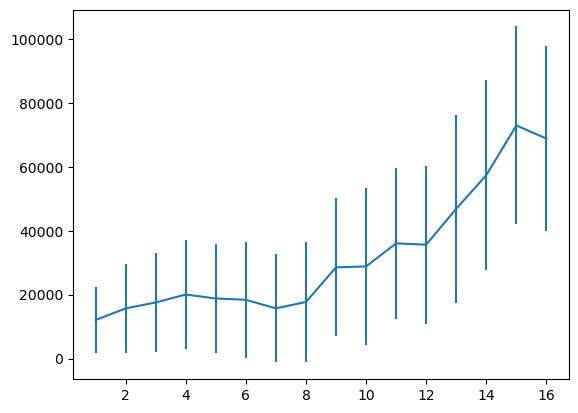

In [35]:
plt.errorbar(np.arange(1,17), income_by_ed, yerr = sd_by_ed)

In [5]:
print(df_adult[df_adult['education-num'] <= 9]['income'].mean(), df_adult[df_adult['education-num'] >= 10]['income'].mean(),df_adult['income'].mean())
# df_adult[(df_adult['education-num'] >= 9) & (df_adult['education-num'] < 13)]['income'].describe(), \
type(df_adult['education-num'] < 9)
# df_adult['education-num'] >= 9

A_t_education = pd.concat([df_adult['education-num'] < 10, df_adult['education-num'] >= 10], axis=1).to_numpy() # high school only, some college higher
A_t_education = np.hstack((A_t_education, np.ones((A_t_education.shape[0],1))))

25400.066418703507 40306.562511596836 33509.84312854576


In [7]:
A_t_education, A_t_education.shape

(array([[0., 1., 1.],
        [0., 1., 1.],
        [1., 0., 1.],
        ...,
        [0., 1., 1.],
        [0., 1., 1.],
        [1., 0., 1.]]),
 (49531, 3))

In [7]:
occ_groups_oh = []
race_groups_oh = []
sex_groups_oh = []
for col in df_adult_mm_oh.columns:
    if 'occu' in col:
        occ_groups_oh.append(col)
    if 'race' in col:
        race_groups_oh.append(col)
    if 'sex' in col:
        sex_groups_oh.append(col)
print(occ_groups_oh, len(occ_groups_oh))
print(race_groups_oh, len(race_groups_oh))
print(sex_groups_oh, len(sex_groups_oh))

['occupation_?', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving'] 15
['race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White'] 5
['sex_Female', 'sex_Male'] 2


In [9]:
def get_A_t_from_onehotdf(df_oh, groups, always_on = False) -> np.ndarray:
    A_tdf = df_oh[groups]
    if always_on:
        A_tdf['alwayson'] = 1
    return A_tdf.to_numpy()

A_t_occp = get_A_t_from_onehotdf(df_adult_mm_oh, occ_groups_oh, always_on = True)
A_t_sex = get_A_t_from_onehotdf(df_adult_mm_oh, sex_groups_oh, always_on = True)
A_t_race = get_A_t_from_onehotdf(df_adult_mm_oh, race_groups_oh, always_on = True)
A_t_occp_race_sex = get_A_t_from_onehotdf(df_adult_mm_oh, occ_groups_oh+sex_groups_oh+race_groups_oh, always_on = True)


/var/folders/t1/gd3l0zxn0hzdg0bsmr1jpsfw0000gn/T/ipykernel_51711/420740270.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A_tdf['alwayson'] = 1
/var/folders/t1/gd3l0zxn0hzdg0bsmr1jpsfw0000gn/T/ipykernel_51711/420740270.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A_tdf['alwayson'] = 1
/var/folders/t1/gd3l0zxn0hzdg0bsmr1jpsfw0000gn/T/ipykernel_51711/420740270.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [93]:
# A_t_occp.shape, A_t_sex.shape, A_t_race.shape, A_t_occp_race_sex.shape, A_t_education.shape

NameError: name 'A_t_occp' is not defined

In [8]:
# Based on education some college v/s only till high school
# Sex group
X_dat = df_adult_mm_oh.drop('income', axis=1)
y_dat = df_adult_mm_oh['income']

dirname = './models_adult/baseline/'
filename = 'ridge_education'


# expridge = OnlineLinearExpert(X_dat, y_dat, l2_pen = 1.0)
expridge = OnlineLinearExpert(X_dat, y_dat, l2_pen = 0.0)
b_ridgebase = build_baseline_alwayson(dirname, filename, A_t_education, expridge)

dirname = './models_adult/Anh/'
filename = 'ridgemeta_education'

# experts = [OnlineLinearExpert(X_dat, y_dat, l2_pen = 1.0) for _ in range(A_t_education.shape[1])]
experts = [OnlineLinearExpert(X_dat, y_dat, l2_pen = 0.0) for _ in range(A_t_education.shape[1])]
b_Anh = build_Anh(dirname, filename, A_t_education, experts)

100%|██████████| 49531/49531 [01:15<00:00, 657.97it/s]


In [9]:
# with ls experts
cumloss_groupwise_ada = b_Anh.Anh.cumloss_groupwise_ada
cumloss_base = b_ridgebase.expert.cumloss_groupwise
count_ada_better = 0
for g_ind in range(A_t_education.shape[1]):
    base = cumloss_base[g_ind][-1]
    ada = cumloss_groupwise_ada[g_ind][-1]
    if base >= ada:
        count_ada_better += 1
    print(g_ind, base, ada , base >= ada)
print(count_ada_better)

0 556.8462863011631 556.4323161520625 True
1 1005.1182933101187 1005.4287908691844 False
2 1561.9645796113005 1561.8611070212673 True
2


In [96]:
# with ridge experts
cumloss_groupwise_ada = b_Anh.Anh.cumloss_groupwise_ada
cumloss_base = b_ridgebase.expert.cumloss_groupwise
count_ada_better = 0
for g_ind in range(A_t_education.shape[1]):
    base = cumloss_base[g_ind][-1]
    ada = cumloss_groupwise_ada[g_ind][-1]
    if base >= ada:
        count_ada_better += 1
    print(g_ind, base, ada , base >= ada)
print(count_ada_better)

0 776.0080116101033 720.3264209921213 True
1 1584.7570784270565 1479.1300808621 True
2 2360.7650900371787 2199.4565018542266 True
3


In [ ]:
# developed vs developing

X_dat = df_adult_mm_oh.drop('income', axis=1)
y_dat = df_adult_mm_oh['income']

dirname = './models_adult/baseline/'
filename = 'ridge_education'


expridge = OnlineLinearExpert(X_dat, y_dat, l2_pen = 1.0)
b_ridgebase = build_baseline_alwayson(dirname, filename, A_t_education, expridge)

dirname = './models_adult/Anh/'
filename = 'ridgemeta_education'

experts = [OnlineLinearExpert(X_dat, y_dat, l2_pen = 1.0) for _ in range(A_t_education.shape[1])]
b_Anh = build_Anh(dirname, filename, A_t_education, experts)


In [115]:
df_adult = pd.read_csv('./data_small/adult_reconstruction.csv')
print("dataset mean", df_adult['income'].mean())
print(df_adult['sex'].unique(), df_adult['race'].unique())
print(df_adult[df_adult['sex'] == 'Male']['income'].mean(), df_adult[df_adult['sex'] == 'Female']['income'].mean())

race_list = ['White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black']
for race in race_list:
    print(race, df_adult[df_adult['race'] == race]['income'].mean())

dataset mean 33509.84312854576
['Female' 'Male'] ['White' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other' 'Black']
38679.59157774161 23024.959894846244
White 34643.764850027095
Asian-Pac-Islander 35456.2159315339
Amer-Indian-Eskimo 24390.79617834395
Other 25381.625615763547
Black 24245.63677034512


In [ ]:
df_adult[df_adult['race'] == 'Male']['income'].mean(), df_adult[df_adult['race'] == 'Female']['income'].mean()

In [17]:
# Sex group
X_dat = df_adult_mm_oh.drop('income', axis=1)
y_dat = df_adult_mm_oh['income']

dirname = './models_adult/baseline/'
filename = 'ridge_sex'


expridge = OnlineLinearExpert(X_dat, y_dat, l2_pen = 1.0)
b_ridgebase = build_baseline_alwayson(dirname, filename, A_t_sex, expridge)

dirname = './models_adult/Anh/'
filename = 'ridgemeta_sex'

experts = [OnlineLinearExpert(X_dat, y_dat, l2_pen = 1.0) for _ in range(A_t_sex.shape[1])]
b_Anh = build_Anh(dirname, filename, A_t_sex, experts)

100%|██████████| 49531/49531 [02:29<00:00, 331.77it/s]


In [18]:
cumloss_groupwise_ada = b_Anh.Anh.cumloss_groupwise_ada
cumloss_base = b_ridgebase.expert.cumloss_groupwise
count_ada_better = 0
for g_ind in range(A_t_sex.shape[1]):
    base = cumloss_base[g_ind][-1]
    ada = cumloss_groupwise_ada[g_ind][-1]
    if base >= ada:
        count_ada_better += 1
    print(g_ind, base, ada , base >= ada)
print(count_ada_better) 

0 543.6830188878803 534.1451671816794 True
1 1758.5187098780991 1749.8806720881093 True
2 2302.2017287659983 2284.0258392697947 True
3


In [19]:
# Race group
X_dat = df_adult_mm_oh.drop('income', axis=1)
y_dat = df_adult_mm_oh['income']

dirname = './models_adult/baseline/'
filename = 'ridge_race'


expridge = OnlineLinearExpert(X_dat, y_dat, l2_pen = 1.0)
b_ridgebase = build_baseline_alwayson(dirname, filename, A_t_race, expridge)

dirname = './models_adult/Anh/'
filename = 'ridgemeta_race'

experts = [OnlineLinearExpert(X_dat, y_dat, l2_pen = 1.0) for _ in range(A_t_race.shape[1])]
b_Anh = build_Anh(dirname, filename, A_t_race, experts)

100%|██████████| 49531/49531 [03:33<00:00, 232.51it/s]


In [20]:
cumloss_groupwise_ada = b_Anh.Anh.cumloss_groupwise_ada
cumloss_base = b_ridgebase.expert.cumloss_groupwise
count_ada_better = 0
for g_ind in range(A_t_race.shape[1]):
    base = cumloss_base[g_ind][-1]
    ada = cumloss_groupwise_ada[g_ind][-1]
    if base >= ada:
        count_ada_better += 1
    print(g_ind, base, ada , base >= ada)
print(count_ada_better) 

0 17.848073208110794 17.86385373737648 False
1 80.85492497634677 82.2541189155916 False
2 152.3003902732592 154.83187307616186 False
3 15.227696958020344 15.316598928807766 False
4 2035.9706433502422 2026.1365434669713 True
5 2302.2017287659983 2296.402988124902 True
2


In [15]:
## Occupation groups
X_dat = df_adult_mm_oh.drop('income', axis=1)
y_dat = df_adult_mm_oh['income']

dirname = './models_adult/baseline/'
filename = 'ridge_occp'

expridge = OnlineLinearExpert(X_dat, y_dat, l2_pen = 1.0)
b_ridgebase = build_baseline_alwayson(dirname, filename, A_t_occp, expridge)

dirname = './models_adult/Anh/'
filename = 'ridgemeta_occp'

experts = [OnlineLinearExpert(X_dat, y_dat, l2_pen = 1.0) for _ in range(A_t_occp.shape[1])]
b_Anh = build_Anh(dirname, filename, A_t_occp, experts)

100%|██████████| 49531/49531 [02:49<00:00, 292.56it/s]


In [16]:
cumloss_groupwise_ada = b_Anh.Anh.cumloss_groupwise_ada
cumloss_base = b_ridgebase.expert.cumloss_groupwise
for g_ind in range(A_t_occp.shape[1]):
    base = cumloss_base[g_ind][-1]
    ada = cumloss_groupwise_ada[g_ind][-1]
    print(g_ind, base, ada , base >= ada) # 12 out of 16

0 128.32610428021982 101.12964194439633 True
1 170.95383882019888 174.56373464697404 False
2 0.5475481872229374 1.4525682574671135 False
3 241.88609302376375 253.66854250279331 False
4 449.93690025372 392.44166482193543 True
5 69.03776452805015 63.098363116805324 True
6 61.369998336587756 45.93891544924698 True
7 80.40866258872735 78.40412185229627 True
8 136.29326513032262 94.947785775834 True
9 7.531286815521961 2.800883277425186 True
10 459.1698447866027 388.82693358243665 True
11 44.98667588881421 43.96996639225248 True
12 298.69001809925817 295.70998891984755 True
13 63.32653524964512 62.657690579638434 True
14 89.73719277731873 90.37650089210793 False
15 2302.2017287659983 2089.9873020114624 True


In [ ]:
# occupation, race and sex groups
X_dat = df_adult_mm_oh.drop('income', axis=1)
y_dat = df_adult_mm_oh['income']

dirname = './models_adult/baseline/'
filename = 'ridge_occp_race_sex'

expridge = OnlineLinearExpert(X_dat, y_dat, l2_pen = 1.0)
b_ridgebase = build_baseline_alwayson(dirname, filename, A_t_occp_race_sex, expridge)

dirname = './models_adult/Anh/'
filename = 'ridge_occp_race_sex'

experts = [OnlineLinearExpert(X_dat, y_dat, l2_pen = 1.0) for _ in range(A_t_occp_race_sex.shape[1])]
b_Anh = build_Anh(dirname, filename, A_t_occp_race_sex, experts)


In [14]:
cumloss_groupwise_ada = b_Anh.Anh.cumloss_groupwise_ada
cumloss_base = b_ridgebase.expert.cumloss_groupwise
count_ada_better = 0
for g_ind in range(A_t_occp_race_sex.shape[1]):
    base = cumloss_base[g_ind][-1]
    ada = cumloss_groupwise_ada[g_ind][-1]
    if base >= ada:
        count_ada_better += 1
    print(g_ind, base, ada , base >= ada)
print(count_ada_better) 

0 128.32610428021982 101.53476713405382 True
1 170.95383882019888 174.68400292013612 False
2 0.5475481872229374 1.4525998132839153 False
3 241.88609302376375 253.99675440494113 False
4 449.93690025372 392.94711032681016 True
5 69.03776452805015 62.84718933903229 True
6 61.369998336587756 46.07072050182842 True
7 80.40866258872735 78.3864896980566 True
8 136.29326513032262 95.17411617872297 True
9 7.531286815521961 2.797637635618626 True
10 459.1698447866027 389.6304676445252 True
11 44.98667588881421 43.91099915368975 True
12 298.69001809925817 295.7754336937206 True
13 63.32653524964512 62.654779559728794 True
14 89.73719277731873 90.3807875128698 False
15 543.6830188878803 500.5054438999503 True
16 1758.5187098780991 1591.7384116170667 True
17 17.848073208110794 17.513228146753164 True
18 80.85492497634677 77.1299588059824 True
19 152.3003902732592 139.90145357401212 True
20 15.227696958020344 14.19390539352929 True
21 2035.9706433502422 1843.5053095967519 True
22 2302.2017287659983 

In [6]:
rand_seeds = np.random.randint(low = 0, high = 100, size=10)
rand_seeds

array([49, 61, 73, 71, 12, 59,  5, 91, 67, 78])

In [ ]:
# shuffle according to above random seeds and record if Anh better than baseline
occp_res_lis = []

In [ ]:
for seed in rand_seeds:
    


In [7]:
# Some Stack OF code on

from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline


# some example data
X = pd.DataFrame({'feature': ['value1', 'value2', 'value2', 'value1', 'value2']})
y = [1, 0, 0, 1, 1]

# translate rows to dicts
def row_to_dict(X, y=None):
    return X.apply(dict, axis=1)

# define prediction model
ft = FunctionTransformer(row_to_dict, validate=False)
dv = DictVectorizer()
rf = RandomForestClassifier()

# glue steps together
model = make_pipeline(ft, dv, rf)

# train
model.fit(X, y)

# get feature importances
feature_importances = zip(dv.feature_names_, rf.feature_importances_)

# have a look
print(rf.feature_importances_)
print(list(feature_importances))

[0.54117647 0.45882353]
[('feature=value1', 0.5411764705882353), ('feature=value2', 0.4588235294117647)]
